<a href="https://colab.research.google.com/github/SalsabilaZaman/ml-train-colab/blob/main/AI_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install opendatasets
!pip install pandas

In [2]:
import opendatasets as od
import pandas

od.download(
    "https://www.kaggle.com/datasets/parulpandey/emotion-dataset")

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: noobsalsa
Your Kaggle Key: ··········
Dataset URL: https://www.kaggle.com/datasets/parulpandey/emotion-dataset


100%|██████████| 715k/715k [00:00<00:00, 580MB/s]

In [3]:
import pandas
csvFile = pandas.read_csv('/content/emotion-dataset/training.csv')
print(csvFile)

                                                    text  label
0                                i didnt feel humiliated      0
1      i can go from feeling so hopeless to so damned...      0
2       im grabbing a minute to post i feel greedy wrong      3
3      i am ever feeling nostalgic about the fireplac...      2
4                                   i am feeling grouchy      3
...                                                  ...    ...
15995  i just had a very brief time in the beanbag an...      0
15996  i am now turning and i feel pathetic that i am...      0
15997                     i feel strong and good overall      1
15998  i feel like this was such a rude comment and i...      3
15999  i know a lot but i feel so stupid because i ca...      0

[16000 rows x 2 columns]


In [4]:
import csv
with open('/content/emotion-dataset/training.csv', mode ='r')as file:
  csvFile = csv.reader(file)
  for lines in csvFile:
        print(lines)

Streaming output truncated to the last 5000 lines.
['i feel exhausted just by writing that', '0']
['im feeling a little regretful but itll pass because thats what happens with regret', '0']
['i feel stressed frequently', '3']
['i can feel the awkwardness and that weird kind of tension', '4']
['i know i just ended a very big giveaway here on the muse but im still feeling quite generous', '2']
['i love getting out the decorations and feeling festive i am happy to put them away', '1']
['i point these things out so as to make clear that i went into this film with the best intentions but left feeling irritated confused and wore out', '3']
['i feel so heartbroken and confused and just blah blah blah', '0']
['i guess you could say i am a loner but i feel more lonely in a crowed room with boring people than i feel on my own', '0']
['i don t feel like i m a valuable person', '1']
['i usually start feeling anxious', '4']
['i am thankful for the opportunity to help others feel better about themse

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


Loading the dataset...

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16000 entries, 0 to 15999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    16000 non-null  object
 1   label   16000 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 250.1+ KB
None

First 5 rows:
                                                text  label
0                            i didnt feel humiliated      0
1  i can go from feeling so hopeless to so damned...      0
2   im grabbing a minute to post i feel greedy wrong      3
3  i am ever feeling nostalgic about the fireplac...      2
4                               i am feeling grouchy      3

Missing Values:
text     0
label    0
dtype: int64

Number of duplicate rows: 1

Label Distribution:
label
1    5362
0    4666
3    2159
4    1937
2    1304
5     572
Name: count, dtype: int64

Label Percentages:
label
1    33.51250
0    29.16250
3    13.49375
4    12.10625
2 

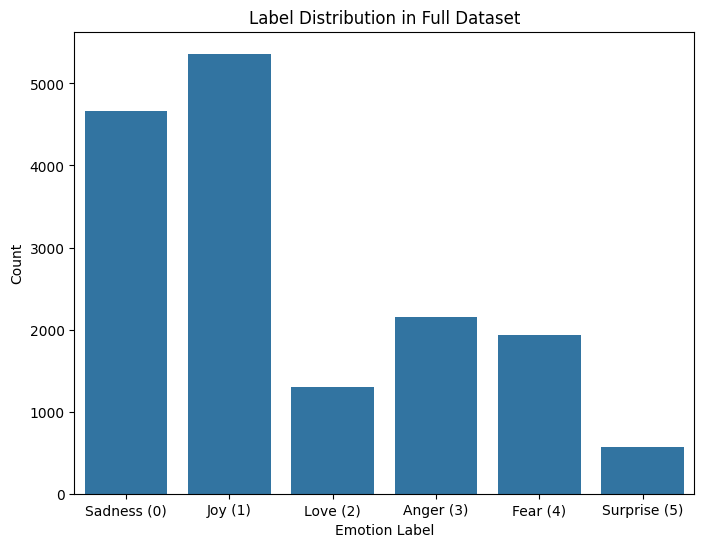


Analyzing text characteristics...

Text Length (Words) Statistics:
count    16000.000000
mean        19.175313
std         10.992725
min          2.000000
25%         11.000000
50%         17.000000
75%         25.000000
max         66.000000
Name: text_length_words, dtype: float64

Text Length (Characters) Statistics:
count    16000.000000
mean        96.845812
std         55.904953
min          7.000000
25%         53.000000
50%         86.000000
75%        129.000000
max        300.000000
Name: text_length_chars, dtype: float64

Sample texts from each class:

Label 0:
  Sample 1: im feeling so lousy they tried to cheer me up during school time and during choir practice
  Sample 2: i feel highly disadvantaged
  Sample 3: i feel humiliated to introduce you to my colleagues as my wife

Label 1:
  Sample 1: i feel im rather innocent in that respect
  Sample 2: im feeling quite adventurous and tried out those drinks that i just normally read through the pages of pocketbooks
  Sample 3: 

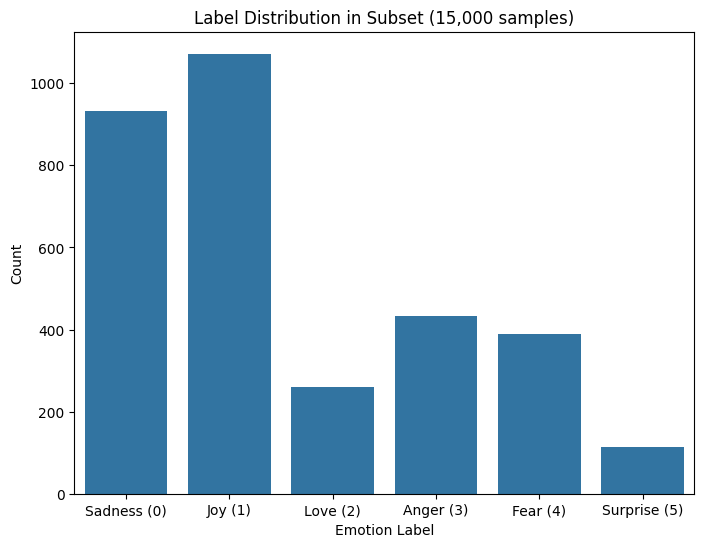


Summary of Findings:
- Total samples: 15999
- Subset samples: 3200
- Class balance: Imbalanced (check percentages)
- Avg text length (words): 18.84
- Max text length (words): 66
- Min text length (words): 2


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
from sklearn.model_selection import train_test_split
import nltk
from nltk.tokenize import word_tokenize
nltk.download('punkt')
# Download punkt_tab resource
nltk.download('punkt_tab')

# Substep 1.1: Load the Dataset
print("Loading the dataset...")
df = pd.read_csv('/content/emotion-dataset/training.csv')  # Replace with your file path

# Display basic information
print("\nDataset Info:")
print(df.info())
print("\nFirst 5 rows:")
print(df.head())

# Check for missing values
print("\nMissing Values:")
print(df.isnull().sum())

# Check for duplicates
print("\nNumber of duplicate rows:", df.duplicated().sum())

# Substep 1.2: Analyze Label Distribution
print("\nLabel Distribution:")
label_counts = df['label'].value_counts()
print(label_counts)
print("\nLabel Percentages:")
print(label_counts / len(df) * 100)

# Visualize label distribution
plt.figure(figsize=(8, 6))
sns.countplot(x='label', data=df)
plt.title('Label Distribution in Full Dataset')
plt.xlabel('Emotion Label')
plt.ylabel('Count')
plt.xticks(ticks=range(6), labels=['Sadness (0)', 'Joy (1)', 'Love (2)', 'Anger (3)', 'Fear (4)', 'Surprise (5)'])
plt.show()

# Substep 1.3: Analyze Text Characteristics
print("\nAnalyzing text characteristics...")
df['text_length_words'] = df['text'].apply(lambda x: len(word_tokenize(str(x).lower())))
df['text_length_chars'] = df['text'].apply(len)

# Summary statistics for text length
print("\nText Length (Words) Statistics:")
print(df['text_length_words'].describe())
print("\nText Length (Characters) Statistics:")
print(df['text_length_chars'].describe())

# Sample texts from each class
print("\nSample texts from each class:")
for label in range(6):
    print(f"\nLabel {label}:")
    samples = df[df['label'] == label]['text'].sample(3, random_state=42)
    for i, text in enumerate(samples, 1):
        print(f"  Sample {i}: {text}")

# Substep 1.4: Clean the Dataset
print("\nCleaning the dataset...")

# Remove missing values
df = df.dropna()

# Remove duplicates
df = df.drop_duplicates()

# Basic text cleaning function
def clean_text(text):
    text = str(text).lower()  # Convert to lowercase
    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)  # Remove URLs
    text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation
    text = re.sub(r'\s+', ' ', text).strip()  # Remove extra whitespace
    return text

df['text'] = df['text'].apply(clean_text)

# Remove empty texts after cleaning
df = df[df['text'] != '']

print("\nCleaned dataset size:", len(df))

# Save cleaned dataset
df.to_csv('cleaned_emotion_dataset.csv', index=False)
print("Cleaned dataset saved as 'cleaned_emotion_dataset.csv'")

# Substep 1.5: Create a Representative Subset
print("\nCreating a 15,000-sample subset...")
subset_size = 15000
# Stratified sampling to maintain class distribution
_, subset_df = train_test_split(df, train_size=0.8, stratify=df['label'], random_state=42)

# Verify subset label distribution
print("\nSubset Label Distribution:")
subset_label_counts = subset_df['label'].value_counts()
print(subset_label_counts)
print("\nSubset Label Percentages:")
print(subset_label_counts / len(subset_df) * 100)

# Save subset
subset_df.to_csv('emotion_subset_15000.csv', index=False)
print("Subset saved as 'emotion_subset_15000.csv'")

# Substep 1.6: Visualize Subset Label Distribution
plt.figure(figsize=(8, 6))
sns.countplot(x='label', data=subset_df)
plt.title('Label Distribution in Subset (15,000 samples)')
plt.xlabel('Emotion Label')
plt.ylabel('Count')
plt.xticks(ticks=range(6), labels=['Sadness (0)', 'Joy (1)', 'Love (2)', 'Anger (3)', 'Fear (4)', 'Surprise (5)'])
plt.show()

# Summarize findings
print("\nSummary of Findings:")
print(f"- Total samples: {len(df)}")
print(f"- Subset samples: {len(subset_df)}")
print(f"- Class balance: {'Balanced' if subset_label_counts.std() < 100 else 'Imbalanced'} (check percentages)")
print(f"- Avg text length (words): {subset_df['text_length_words'].mean():.2f}")
print(f"- Max text length (words): {subset_df['text_length_words'].max()}")
print(f"- Min text length (words): {subset_df['text_length_words'].min()}")

In [6]:
!pip install pandas matplotlib seaborn scikit-learn nltk

In [7]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import nltk
from transformers import BertTokenizer
import torch
import re

# Download required NLTK data
nltk.download('punkt')
nltk.download('stopwords')

# Substep 2.1: Load the Cleaned Subset
print("Loading the cleaned subset...")
df = pd.read_csv('emotion_subset_15000.csv')  # Replace with your file path
print("\nSubset Info:")
print(df.info())
print("\nFirst 5 rows:")
print(df.head())

# Check for any new issues
print("\nMissing Values:")
print(df.isnull().sum())
df = df.dropna()  # Drop any unexpected missing values

# Substep 2.2: Advanced Text Cleaning
print("\nPerforming advanced text cleaning...")

def advanced_clean_text(text, for_bert=False):
    text = str(text).lower()  # Convert to lowercase
    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)  # Remove URLs
    text = re.sub(r'\s+', ' ', text).strip()  # Remove extra whitespace
    if not for_bert:
        # For TF-IDF: remove punctuation and stop words
        text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation
        stop_words = set(stopwords.words('english'))
        tokens = word_tokenize(text)
        text = ' '.join([word for word in tokens if word not in stop_words])
    else:
        # For BERT: keep punctuation and normalize special characters
        text = re.sub(r'[^\w\s!?]', '', text)  # Keep basic punctuation (e.g., !, ?)
        text = re.sub(r'[!]{2,}', '!', text)  # Normalize multiple exclamations
        text = re.sub(r'[?]{2,}', '?', text)  # Normalize multiple question marks
    return text

# Apply cleaning for TF-IDF and BERT separately
df['text_tfidf'] = df['text'].apply(lambda x: advanced_clean_text(x, for_bert=False))
df['text_bert'] = df['text'].apply(lambda x: advanced_clean_text(x, for_bert=True))

# Remove any empty texts after cleaning
df = df[df['text_tfidf'] != '']
df = df[df['text_bert'] != '']
print("\nDataset size after cleaning:", len(df))

# Save cleaned dataset
df.to_csv('preprocessed_emotion_subset_15000.csv', index=False)
print("Preprocessed dataset saved as 'preprocessed_emotion_subset_15000.csv'")

# Substep 2.3 & 2.4: Tokenization and Feature Extraction for TF-IDF
print("\nPerforming TF-IDF tokenization and feature extraction...")
tfidf_vectorizer = TfidfVectorizer(max_features=5000, tokenizer=word_tokenize)
tfidf_features = tfidf_vectorizer.fit_transform(df['text_tfidf']).toarray()
tfidf_labels = df['label'].values

# Save TF-IDF features and vectorizer
np.save('tfidf_features.npy', tfidf_features)
np.save('tfidf_labels.npy', tfidf_labels)
import pickle
with open('tfidf_vectorizer.pkl', 'wb') as f:
    pickle.dump(tfidf_vectorizer, f)
print("TF-IDF features shape:", tfidf_features.shape)
print("Saved TF-IDF features and vectorizer.")

# Substep 2.3 & 2.4: Tokenization and Feature Extraction for BERT
print("\nPerforming BERT tokenization and feature extraction...")
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
max_length = 128  # Adjust based on your data (from Step 1 insights)

def bert_tokenize(text):
    encoding = tokenizer.encode_plus(
        text,
        add_special_tokens=True,  # Add [CLS] and [SEP]
        max_length=max_length,
        padding='max_length',
        truncation=True,
        return_attention_mask=True,
        return_tensors='pt'  # Return PyTorch tensors
    )
    return encoding['input_ids'].squeeze(), encoding['attention_mask'].squeeze()

# Apply BERT tokenization
bert_inputs = df['text_bert'].apply(bert_tokenize)
input_ids = torch.stack([x[0] for x in bert_inputs])
attention_masks = torch.stack([x[1] for x in bert_inputs])
bert_labels = torch.tensor(df['label'].values)

# Save BERT features
torch.save(input_ids, 'bert_input_ids.pt')
torch.save(attention_masks, 'bert_attention_masks.pt')
torch.save(bert_labels, 'bert_labels.pt')
print("BERT input_ids shape:", input_ids.shape)
print("BERT attention_masks shape:", attention_masks.shape)
print("Saved BERT features.")

# Substep 2.5: Prepare Data for Training
print("\nPreparing data for training...")
# TF-IDF data is already in NumPy arrays: tfidf_features, tfidf_labels
# BERT data is in PyTorch tensors: input_ids, attention_masks, bert_labels

# Substep 2.6: Validate Preprocessing
print("\nValidating preprocessing...")
# Check a few samples
print("\nSample TF-IDF texts and features:")
for i in range(3):
    print(f"Text {i+1}: {df['text_tfidf'].iloc[i]}")
    print(f"TF-IDF feature (first 10 values): {tfidf_features[i][:10]}")
    print(f"Label: {tfidf_labels[i]}")

print("\nSample BERT texts and tokens:")
for i in range(3):
    print(f"Text {i+1}: {df['text_bert'].iloc[i]}")
    print(f"Input IDs (first 10): {input_ids[i][:10].tolist()}")
    print(f"Attention Mask (first 10): {attention_masks[i][:10].tolist()}")
    print(f"Label: {bert_labels[i]}")

# Verify feature dimensions
print("\nTF-IDF feature dimensions:", tfidf_features.shape)
print("BERT input_ids dimensions:", input_ids.shape)
print("BERT attention_masks dimensions:", attention_masks.shape)
print("Labels match features (TF-IDF):", len(tfidf_labels) == tfidf_features.shape[0])
print("Labels match features (BERT):", len(bert_labels) == input_ids.shape[0])

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


Loading the cleaned subset...

Subset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3200 entries, 0 to 3199
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   text               3200 non-null   object
 1   label              3200 non-null   int64 
 2   text_length_words  3200 non-null   int64 
 3   text_length_chars  3200 non-null   int64 
dtypes: int64(3), object(1)
memory usage: 100.1+ KB
None

First 5 rows:
                                                text  label  \
0  i always feel very threatened by her when it c...      4   
1  i have a few favourites of my own but the choi...      2   
2  i hate feeling indecisive because im being neg...      4   
3      i feel more shitty and emotional and helpless      0   
4  i can look back likely years from now realize ...      1   

   text_length_words  text_length_chars  
0                 31                137  
1                 44             

/usr/local/lib/python3.11/dist-packages/sklearn/feature_extraction/text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


TF-IDF features shape: (3200, 5000)
Saved TF-IDF features and vectorizer.

Performing BERT tokenization and feature extraction...


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:104: UserWarning: 
Error while fetching `HF_TOKEN` secret value from your vault: 'Requesting secret HF_TOKEN timed out. Secrets can only be fetched when running from the Colab UI.'.
You are not authenticated with the Hugging Face Hub in this notebook.
If the error persists, please let us know by opening an issue on GitHub (https://github.com/huggingface/huggingface_hub/issues/new).
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

BERT input_ids shape: torch.Size([3200, 128])
BERT attention_masks shape: torch.Size([3200, 128])
Saved BERT features.

Preparing data for training...

Validating preprocessing...

Sample TF-IDF texts and features:
Text 1: always feel threatened comes guys cox gets lot contact guys like like first bf
TF-IDF feature (first 10 values): [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
Label: 4
Text 2: favourites choice book dvd us uk im feeling generous limit something like
TF-IDF feature (first 10 values): [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
Label: 2
Text 3: hate feeling indecisive im negative right dont know want
TF-IDF feature (first 10 values): [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
Label: 4

Sample BERT texts and tokens:
Text 1: i always feel very threatened by her when it comes to guys cox you no she gets a lot of contact with the guys i like like my first and bf
Input IDs (first 10): [101, 1045, 2467, 2514, 2200, 5561, 2011, 2014, 2043, 2009]
Attention Mask (first 10): [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
Label: 4


Step 3: Splitting data into training, validation, and test sets...
Loaded TF-IDF features shape: (3200, 5000)
Loaded labels shape: (3200,)
Total samples: 3200
Training samples: ~2560
Validation samples: ~320
Test samples: ~320
Split data saved: tfidf_train_features.npy, tfidf_val_features.npy, tfidf_test_features.npy, etc.

Validating splits...
Training set size: 2560
Validation set size: 320
Test set size: 320
Original Subset Label Distribution percentages:
Label 0: 29.16%
Label 1: 33.50%
Label 2: 8.16%
Label 3: 13.50%
Label 4: 12.12%
Label 5: 3.56%


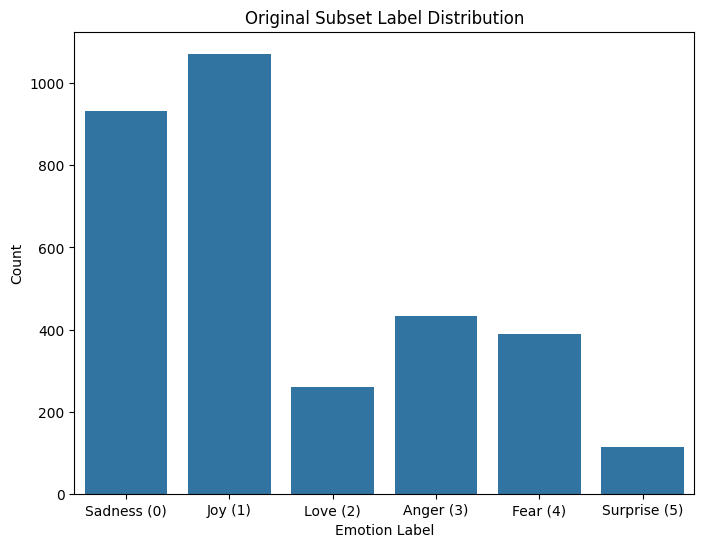

Training Set Label Distribution percentages:
Label 0: 29.18%
Label 1: 33.52%
Label 2: 8.16%
Label 3: 13.52%
Label 4: 12.11%
Label 5: 3.52%


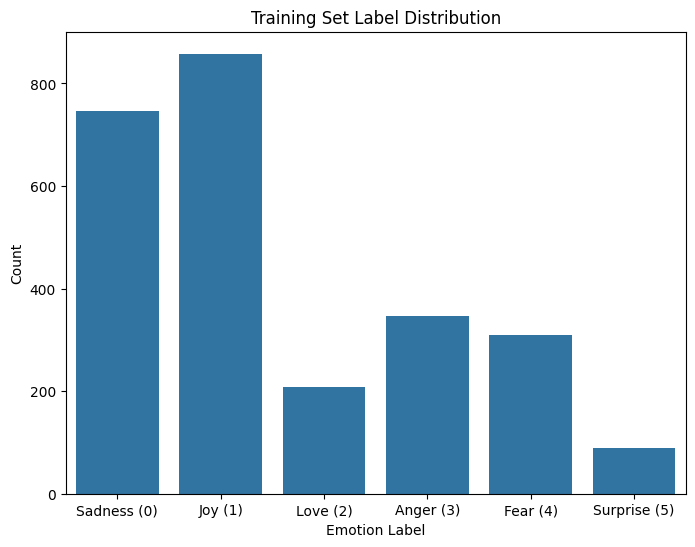

Validation Set Label Distribution percentages:
Label 0: 29.06%
Label 1: 33.44%
Label 2: 8.12%
Label 3: 13.44%
Label 4: 12.19%
Label 5: 3.75%


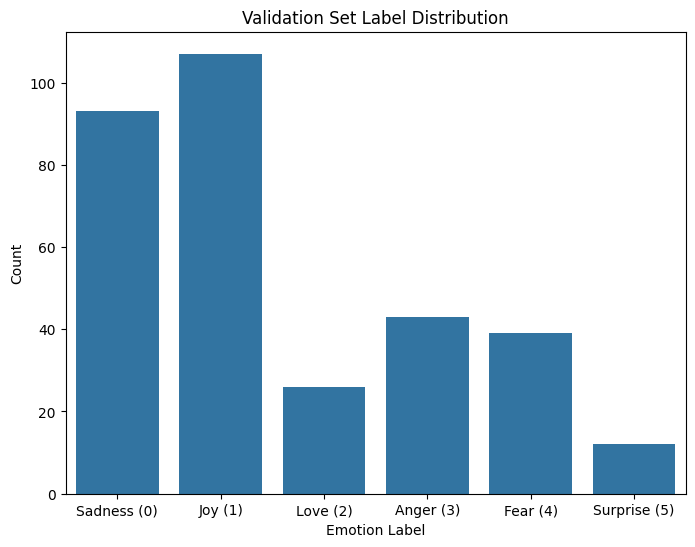

Test Set Label Distribution percentages:
Label 0: 29.06%
Label 1: 33.44%
Label 2: 8.12%
Label 3: 13.44%
Label 4: 12.19%
Label 5: 3.75%


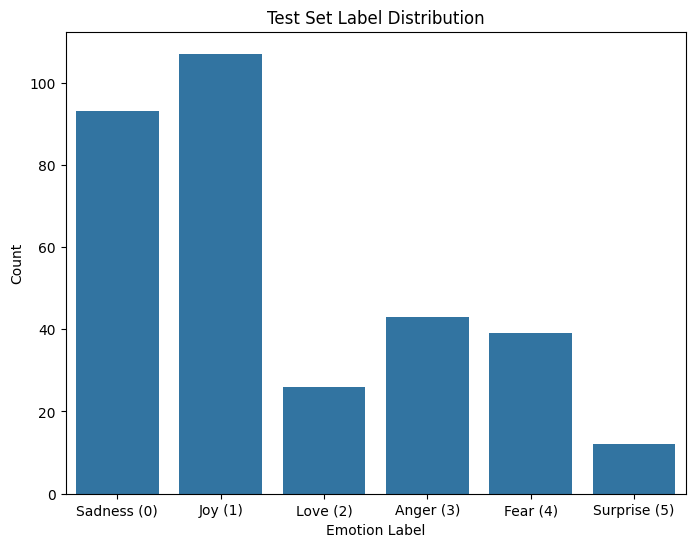


Step 4: Choosing Logistic Regression as the simple model...
Model: Logistic Regression with multinomial loss, balanced class weights, lbfgs solver.
Hyperparameters to tune: {'C': [0.1, 1.0, 10.0]}

Step 5: Training and tuning the model...
Fitting 3 folds for each of 3 candidates, totalling 9 fits


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(



Best hyperparameters: {'C': 10.0}
Best cross-validation macro F1-score: 0.7195677916881976

Evaluating on validation set...

Validation Metrics:
Accuracy: 0.8375
Macro Precision: 0.8431
Macro Recall: 0.7855
Macro F1-score: 0.8099


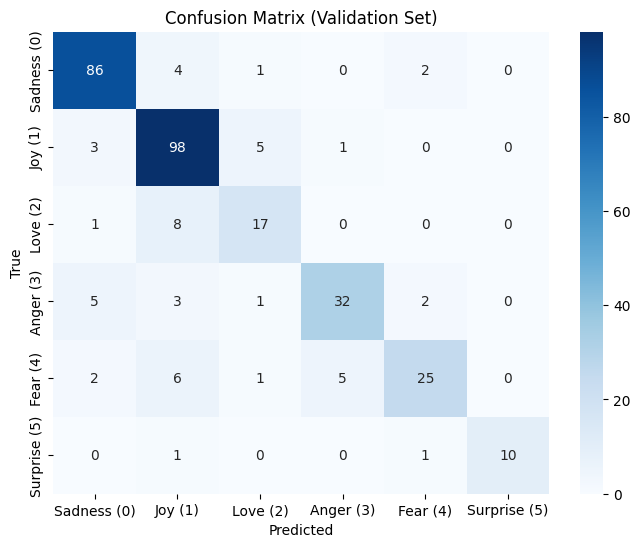


Saving trained model and metrics...
Model saved as 'logistic_regression_model.pkl'
Validation metrics saved as 'validation_metrics.pkl'


In [8]:
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_recall_fscore_support, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import pickle

# Step 3: Split Data into Training, Validation, and Test Sets
print("Step 3: Splitting data into training, validation, and test sets...")

# Load preprocessed TF-IDF features and labels from Step 2
try:
    X = np.load('tfidf_features.npy')
    y = np.load('tfidf_labels.npy')
    print(f"Loaded TF-IDF features shape: {X.shape}")
    print(f"Loaded labels shape: {y.shape}")
except FileNotFoundError:
    print("Error: 'tfidf_features.npy' or 'tfidf_labels.npy' not found. Ensure Step 2 was completed.")
    exit(1)

# Verify data integrity
if X.shape[0] != y.shape[0]:
    print("Error: Number of samples in features and labels do not match.")
    exit(1)

# Define split ratios (80% train, 10% validation, 10% test)
train_ratio = 0.8
val_ratio = 0.1
test_ratio = 0.1
total_samples = X.shape[0]
print(f"Total samples: {total_samples}")
print(f"Training samples: ~{int(total_samples * train_ratio)}")
print(f"Validation samples: ~{int(total_samples * val_ratio)}")
print(f"Test samples: ~{int(total_samples * test_ratio)}")

# Perform stratified splitting
X_temp, X_test, y_temp, y_test = train_test_split(
    X, y, test_size=test_ratio, stratify=y, random_state=42
)
X_train, X_val, y_train, y_val = train_test_split(
    X_temp, y_temp, test_size=val_ratio/(train_ratio + val_ratio), stratify=y_temp, random_state=42
)

# Save split data
np.save('tfidf_train_features.npy', X_train)
np.save('tfidf_val_features.npy', X_val)
np.save('tfidf_test_features.npy', X_test)
np.save('tfidf_train_labels.npy', y_train)
np.save('tfidf_val_labels.npy', y_val)
np.save('tfidf_test_labels.npy', y_test)
print("Split data saved: tfidf_train_features.npy, tfidf_val_features.npy, tfidf_test_features.npy, etc.")

# Validate splits
print("\nValidating splits...")
print(f"Training set size: {X_train.shape[0]}")
print(f"Validation set size: {X_val.shape[0]}")
print(f"Test set size: {X_test.shape[0]}")

# Check label distributions
def plot_label_distribution(labels, title):
    label_counts = np.unique(labels, return_counts=True)[1]
    percentages = label_counts / len(labels) * 100
    print(f"{title} percentages:")
    for i, pct in enumerate(percentages):
        print(f"Label {i}: {pct:.2f}%")
    plt.figure(figsize=(8, 6))
    sns.countplot(x=labels)
    plt.title(title)
    plt.xlabel('Emotion Label')
    plt.ylabel('Count')
    plt.xticks(ticks=range(6), labels=['Sadness (0)', 'Joy (1)', 'Love (2)', 'Anger (3)', 'Fear (4)', 'Surprise (5)'])
    plt.show()

plot_label_distribution(y, 'Original Subset Label Distribution')
plot_label_distribution(y_train, 'Training Set Label Distribution')
plot_label_distribution(y_val, 'Validation Set Label Distribution')
plot_label_distribution(y_test, 'Test Set Label Distribution')

# Step 4: Choose a Model (Logistic Regression)
print("\nStep 4: Choosing Logistic Regression as the simple model...")
model = LogisticRegression(multi_class='multinomial', class_weight='balanced', solver='lbfgs', max_iter=1000)
print("Model: Logistic Regression with multinomial loss, balanced class weights, lbfgs solver.")

# Define hyperparameters for tuning
param_grid = {'C': [0.1, 1.0, 10.0]}  # Inverse regularization strength
print("Hyperparameters to tune:", param_grid)

# Step 5: Train the Model
print("\nStep 5: Training and tuning the model...")

# Set up GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(
    estimator=model,
    param_grid=param_grid,
    scoring='f1_macro',  # Macro F1-score for imbalanced classes
    cv=3,  # 3-fold cross-validation
    verbose=1,
    n_jobs=-1  # Use all available cores
)

# Train the model
try:
    grid_search.fit(X_train, y_train)
except Exception as e:
    print(f"Error during training: {e}")
    exit(1)

# Get the best model
best_model = grid_search.best_estimator_
print("\nBest hyperparameters:", grid_search.best_params_)
print("Best cross-validation macro F1-score:", grid_search.best_score_)

# Evaluate on validation set
print("\nEvaluating on validation set...")
y_val_pred = best_model.predict(X_val)

# Compute metrics
accuracy = accuracy_score(y_val, y_val_pred)
precision, recall, f1, _ = precision_recall_fscore_support(y_val, y_val_pred, average='macro')
print("\nValidation Metrics:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Macro Precision: {precision:.4f}")
print(f"Macro Recall: {recall:.4f}")
print(f"Macro F1-score: {f1:.4f}")

# Confusion matrix
cm = confusion_matrix(y_val, y_val_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Sadness (0)', 'Joy (1)', 'Love (2)', 'Anger (3)', 'Fear (4)', 'Surprise (5)'],
            yticklabels=['Sadness (0)', 'Joy (1)', 'Love (2)', 'Anger (3)', 'Fear (4)', 'Surprise (5)'])
plt.title('Confusion Matrix (Validation Set)')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Save the trained model and metrics
print("\nSaving trained model and metrics...")
with open('logistic_regression_model.pkl', 'wb') as f:
    pickle.dump(best_model, f)
metrics = {
    'accuracy': accuracy,
    'macro_precision': precision,
    'macro_recall': recall,
    'macro_f1': f1,
    'best_params': grid_search.best_params_
}
with open('validation_metrics.pkl', 'wb') as f:
    pickle.dump(metrics, f)
print("Model saved as 'logistic_regression_model.pkl'")
print("Validation metrics saved as 'validation_metrics.pkl'")

In [ ]:
import numpy as np
import pickle
import re
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import nltk

# Download NLTK data (run once)
nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download('stopwords')

# Load the trained model and TF-IDF vectorizer
try:
    with open('logistic_regression_model.pkl', 'rb') as f:
        model = pickle.load(f)
    with open('tfidf_vectorizer.pkl', 'rb') as f:
        vectorizer = pickle.load(f)
except FileNotFoundError:
    print("Error: 'logistic_regression_model.pkl' or 'tfidf_vectorizer.pkl' not found.")
    print("Run Steps 2–5 to generate these files (preprocess, split, train).")
    exit(1)

# Define empathetic responses for each emotion
responses = {
    0: "I'm so sorry you're feeling sad. Would you like to share more? I'm here for you.",
    1: "That's awesome to hear! What's making you so happy today?",
    2: "Love is beautiful! Want to tell me more about what's in your heart?",
    3: "I hear you're upset. Can I help you talk through what's making you angry?",
    4: "I understand you're feeling scared. I'm here to listen if you want to share.",
    5: "Wow, that's surprising! What's got you so shocked?"
}

# Text cleaning function (same as Step 2)
def clean_text(text):
    text = str(text).lower()
    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)
    text = re.sub(r'[^\w\s]', '', text)
    text = re.sub(r'\s+', ' ', text).strip()
    stop_words = set(stopwords.words('english'))
    tokens = word_tokenize(text)
    return ' '.join([word for word in tokens if word not in stop_words])

# Function to predict emotion and get response
def predict_emotion(text):
    if not text.strip():
        return None, 0, "Please enter some text."
    text_clean = clean_text(text)
    if not text_clean:
        return None, 0, "Invalid input. Try again."
    text_tfidf = vectorizer.transform([text_clean]).toarray()
    probs = model.predict_proba(text_tfidf)[0]
    emotion = model.predict(text_tfidf)[0]
    confidence = np.max(probs)
    if confidence < 0.5:
        return None, confidence, "I'm not sure how you're feeling. Could you share more?"
    return emotion, confidence, responses[emotion] + " (Note: I'm not a professional; consider talking to a counselor.)"

# Command-line chatbot interface
print("Welcome to your Mental Health Chatbot! Type your feelings (or 'quit' to exit).")
while True:
    user_input = input("You: ")
    if user_input.lower() == 'quit':
        print("Goodbye!")
        break
    emotion, confidence, response = predict_emotion(user_input)
    emotion_name = ['Sadness', 'Joy', 'Love', 'Anger', 'Fear', 'Surprise'][emotion] if emotion is not None else 'Unknown'
    print(f"Chatbot: {response}")
    print(f"(Detected emotion: {emotion_name}, Confidence: {confidence:.4f})\n")

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Welcome to your Mental Health Chatbot! Type your feelings (or 'quit' to exit).
You: hi how have you been
Chatbot: I'm not sure how you're feeling. Could you share more?
(Detected emotion: Unknown, Confidence: 0.4815)

You: hi i am maria, i feel so monotonus today, a lot of things happened with me recently
Chatbot: I'm not sure how you're feeling. Could you share more?
(Detected emotion: Unknown, Confidence: 0.3998)

You: i feel so devastataed
Chatbot: I'm so sorry you're feeling sad. Would you like to share more? I'm here for you. (Note: I'm not a professional; consider talking to a counselor.)
(Detected emotion: Sadness, Confidence: 0.5108)

You: i am so happyyyyyyyyyyyyyyyyyyyyyyyyyyyy
Chatbot: I'm not sure how you're feeling. Could you share more?
(Detected emotion: Unknown, Confidence: 0.3490)



In [4]:
import pandas as pd
import torch
from transformers import BertTokenizer
from sklearn.model_selection import train_test_split
import re
import numpy as np
import nltk

# Download NLTK data
nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download('stopwords')

# Step 2: Preprocess for BERT
print("Preprocessing for BERT...")
try:
    df = pd.read_csv('emotion_subset_15000.csv')  # Replace with your file path
except FileNotFoundError:
    print("Error: 'emotion_subset_15000.csv' not found.")
    exit(1)

def clean_text(text):
    text = str(text).lower()
    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)
    text = re.sub(r'[^\w\s!?]', '', text)
    text = re.sub(r'[!]{2,}', '!', text)
    text = re.sub(r'[?]{2,}', '?', text)
    text = re.sub(r'\s+', ' ', text).strip()
    return text

df = df.dropna()
df['text_clean'] = df['text'].apply(clean_text)
df = df[df['text_clean'] != '']
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
max_length = 128

def bert_tokenize(text):
    encoding = tokenizer.encode_plus(
        text,
        add_special_tokens=True,
        max_length=max_length,
        padding='max_length',
        truncation=True,
        return_attention_mask=True,
        return_tensors='pt'
    )
    return encoding['input_ids'].squeeze(), encoding['attention_mask'].squeeze()

bert_inputs = df['text_clean'].apply(bert_tokenize)
input_ids = torch.stack([x[0] for x in bert_inputs])
attention_masks = torch.stack([x[1] for x in bert_inputs])
labels = torch.tensor(df['label'].values)
torch.save(input_ids, 'bert_input_ids.pt')
torch.save(attention_masks, 'bert_attention_masks.pt')
torch.save(labels, 'bert_labels.pt')
print("Saved: bert_input_ids.pt, bert_attention_masks.pt, bert_labels.pt")

# Step 3: Split Data
print("Splitting data...")
indices = np.arange(len(df))
temp_idx, test_idx = train_test_split(indices, test_size=0.1, stratify=df['label'], random_state=42)
train_idx, val_idx = train_test_split(temp_idx, test_size=0.1111, stratify=df['label'][temp_idx], random_state=42)
torch.save(input_ids[train_idx], 'bert_train_input_ids.pt')
torch.save(attention_masks[train_idx], 'bert_train_attention_masks.pt')
torch.save(labels[train_idx], 'bert_train_labels.pt')
torch.save(input_ids[val_idx], 'bert_val_input_ids.pt')
torch.save(attention_masks[val_idx], 'bert_val_attention_masks.pt')
torch.save(labels[val_idx], 'bert_val_labels.pt')
torch.save(input_ids[test_idx], 'bert_test_input_ids.pt')
torch.save(attention_masks[test_idx], 'bert_test_attention_masks.pt')
torch.save(labels[test_idx], 'bert_test_labels.pt')
print("Saved: BERT split files")

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


Preprocessing for BERT...


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

Saved: bert_input_ids.pt, bert_attention_masks.pt, bert_labels.pt
Splitting data...
Saved: BERT split files


In [ ]:
import torch
from torch.utils.data import TensorDataset, DataLoader
from transformers import BertTokenizer, BertForSequenceClassification
from torch.optim import AdamW
import numpy as np
import re
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import nltk
from sklearn.metrics import f1_score
import os

# Download NLTK data
nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download('stopwords')

# Check for GPU
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"Using device: {device}")

# Step 4: Choose BERT Model
print("Step 4: Choosing BERT model...")
model = BertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=6).to(device)
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

# Step 5: Train the BERT Model
print("\nStep 5: Training BERT model...")

# Load split data from Step 3
try:
    train_input_ids = torch.load('bert_train_input_ids.pt')
    train_attention_masks = torch.load('bert_train_attention_masks.pt')
    train_labels = torch.load('bert_train_labels.pt')
    val_input_ids = torch.load('bert_val_input_ids.pt')
    val_attention_masks = torch.load('bert_val_attention_masks.pt')
    val_labels = torch.load('bert_val_labels.pt')
except FileNotFoundError:
    print("Error: BERT split data files not found. Run Steps 2–3 to generate them.")
    exit(1)

# Create DataLoaders
train_dataset = TensorDataset(train_input_ids, train_attention_masks, train_labels)
val_dataset = TensorDataset(val_input_ids, val_attention_masks, val_labels)
train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=16)

# Optimizer and scheduler
optimizer = AdamW(model.parameters(), lr=2e-5, eps=1e-8)
epochs = 4
best_val_f1 = 0
patience = 2
no_improve = 0

# Training loop with early stopping
for epoch in range(epochs):
    model.train()
    total_loss = 0
    for batch in train_loader:
        b_input_ids, b_attention_mask, b_labels = [b.to(device) for b in batch]
        model.zero_grad()
        outputs = model(b_input_ids, attention_mask=b_attention_mask, labels=b_labels)
        loss = outputs.loss
        total_loss += loss.item()
        loss.backward()
        optimizer.step()
    avg_train_loss = total_loss / len(train_loader)

    # Validation
    model.eval()
    val_preds = []
    val_true = []
    with torch.no_grad():
        for batch in val_loader:
            b_input_ids, b_attention_mask, b_labels = [b.to(device) for b in batch]
            outputs = model(b_input_ids, attention_mask=b_attention_mask)
            preds = torch.argmax(outputs.logits, dim=1)
            val_preds.extend(preds.cpu().numpy())
            val_true.extend(b_labels.cpu().numpy())
    val_f1 = f1_score(val_true, val_preds, average='macro')
    print(f"Epoch {epoch+1}: Train Loss = {avg_train_loss:.4f}, Val Macro F1 = {val_f1:.4f}")

    # Early stopping
    if val_f1 > best_val_f1:
        best_val_f1 = val_f1
        torch.save(model.state_dict(), 'bert_model.pt')
        no_improve = 0
    else:
        no_improve += 1
        if no_improve >= patience:
            print("Early stopping triggered.")
            break

# Load best model
model.load_state_dict(torch.load('bert_model.pt'))
model.eval()

# Step 8: Integrate into Chatbot
print("\nStep 8: Setting up chatbot...")

# Empathetic responses
responses = {
    0: "I'm so sorry you're feeling sad. Would you like to share more? I'm here for you.",
    1: "That's awesome to hear! What's making you so happy today?",
    2: "Love is beautiful! Want to tell me more about what's in your heart?",
    3: "I hear you're upset. Can I help you talk through what's making you angry?",
    4: "I understand you're feeling scared. I'm here to listen if you want to share.",
    5: "Wow, that's surprising! What's got you so shocked?"
}

# Text cleaning function (same as Step 2, BERT mode)
def clean_text(text):
    text = str(text).lower()
    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)
    text = re.sub(r'[^\w\s!?]', '', text)
    text = re.sub(r'[!]{2,}', '!', text)
    text = re.sub(r'[?]{2,}', '?', text)
    text = re.sub(r'\s+', ' ', text).strip()
    return text

# Predict emotion for user input
def predict_emotion(text):
    if not text.strip():
        return None, 0, "Please enter some text."
    text_clean = clean_text(text)
    if not text_clean:
        return None, 0, "Invalid input. Try again."
    encoding = tokenizer.encode_plus(
        text_clean,
        add_special_tokens=True,
        max_length=128,
        padding='max_length',
        truncation=True,
        return_attention_mask=True,
        return_tensors='pt'
    )
    input_ids = encoding['input_ids'].to(device)
    attention_mask = encoding['attention_mask'].to(device)
    with torch.no_grad():
        outputs = model(input_ids, attention_mask=attention_mask)
        probs = torch.softmax(outputs.logits, dim=1)[0]
        emotion = torch.argmax(probs).item()
        confidence = probs[emotion].item()
    if confidence < 0.5:
        return None, confidence, "I'm not sure how you're feeling. Could you share more?"
    return emotion, confidence, responses[emotion] + " (Note: I'm not a professional; consider talking to a counselor.)"

# Command-line chatbot interface
print("\nWelcome to your BERT-based Mental Health Chatbot! Type your feelings (or 'quit' to exit).")
while True:
    user_input = input("You: ")
    if user_input.lower() == 'quit':
        print("Goodbye!")
        break
    emotion, confidence, response = predict_emotion(user_input)
    emotion_name = ['Sadness', 'Joy', 'Love', 'Anger', 'Fear', 'Surprise'][emotion] if emotion is not None else 'Unknown'
    print(f"Chatbot: {response}")
    print(f"(Detected emotion: {emotion_name}, Confidence: {confidence:.4f})\n")

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Using device: cpu
Step 4: Choosing BERT model...


model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.



Step 5: Training BERT model...


/usr/local/lib/python3.11/dist-packages/torch/nn/modules/module.py:1750: FutureWarning: `encoder_attention_mask` is deprecated and will be removed in version 4.55.0 for `BertSdpaSelfAttention.forward`.
  return forward_call(*args, **kwargs)
